### Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

## Importing the dataset

In [2]:
df = pd.read_excel('world.xls')
X = df.drop(columns=["Country","Continent"])
y = df["Country"]

In [3]:
df.head(15)

Country         Continent     Area     POP92     POP93  PopGrowth  \
0        A            Europe    83835   7689000   7712000        0.3   
1     AFGH              Asia   647497  17305000  18205000        5.2   
2     AFRI            Africa  1221037  41697000  42823000        2.7   
3     ALBA            Europe    28748   3395000   3456000        1.8   
4     ALGE            Africa  2381740  26673000  27339000        2.5   
5     ANBA  N&CentralAmerica      440     64000     65000        0.4   
6      AND            Europe      466     54000     56000        2.4   
7     ANGO            Africa  1246700   8902000   9142000        2.7   
8     ANNE  N&CentralAmerica      960    184000    185000        0.2   
9     ARAB              Asia  2149690  18621000  19403000        4.2   
10     ARG     South America  2766889  33023000  33387000        1.1   
11    ARUB  N&CentralAmerica      193     64000     65000        0.6   
12     AUS       Aus&Oceania  7686848  17547000  17811000        1.5   
13       B            Europe    30513   9932000   9942000        0.1   
14    BAHA  N&CentralAmerica    13934    256000    259000        1.4   

    Urbanisation  LifeExpMen  LifeExpWomen  BirthRate  ...  PopPerHospBed  \
0             55          74            81         12  ...            102   
1             18          44            43         44  ...           2393   
2             58          61            67         34  ...            413   
3             36          72            79         24  ...            183   
4             48          66            68         32  ...            413   
5             58          70            74         18  ...            165   
6             64          74            81         11  ...            469   
7             26          42            46         47  ...            659   
8             53          74            79         18  ...            115   
9             73          65            68         37  ...            554   
10            86          68            74         20  ...            216   
11            53          72            80         15  ...            193   
12            85          74            80         15  ...            199   
13            95          74            81         12  ...            109   
14            75          69            76         19  ...            250   

    Ndoctors  PopPerDoct   GNP91  GNPGrowth  GNPperHabitant  GNPAgriculture  \
0      21374         359  136422        1.7           17796               3   
1       2957        5563    3154        0.0             192              65   
2      22775        1783   88629        1.5            2183               5   
3       6308         529    3800        0.0            1139              33   
4      17760        1465   56351        3.0            2166              14   
5         48        1333     256        5.4            4000               5   
6        112         473     383        3.1            7226               6   
7        655       13234    7167        9.2             827              14   
8        227         811     912        3.0            4957               1   
9      15347        1164   86070       -2.2            4816               7   
10     81260         402   68368       -0.3            2093              15   
11        67         955     843       16.7           13172               2   
12     36610         472  257376        3.1           14888               5   
13     31178         318  166594        1.4           16790               2   
14       296         851    3080        4.5           12222               4   

    GNPIndustry  GNPServices  LiteracyRate  
0            37           60            99  
1            20           15            29  
2            43           52            76  
3            52           15            72  
4            49           37            50  
5            22           73            89  
6            37           57         

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training the SOM


In [5]:
from minisom import MiniSom
size= 15
som = MiniSom(size, size, input_len= X.shape[1],neighborhood_function='gaussian', sigma= 1.0, learning_rate = 0.5, topology = 'hexagonal')
som.random_weights_init(X)
SOM = som.train_random(data = X, num_iteration = 100, verbose = True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.15551044905495232


## Visualizing the results


C:\Users\Slims\AppData\Local\Temp\ipykernel_19428\4004230946.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolor(som.distance_map().T, cmap='plasma', alpha=.9)
C:\Users\Slims\AppData\Local\Temp\ipykernel_19428\4004230946.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


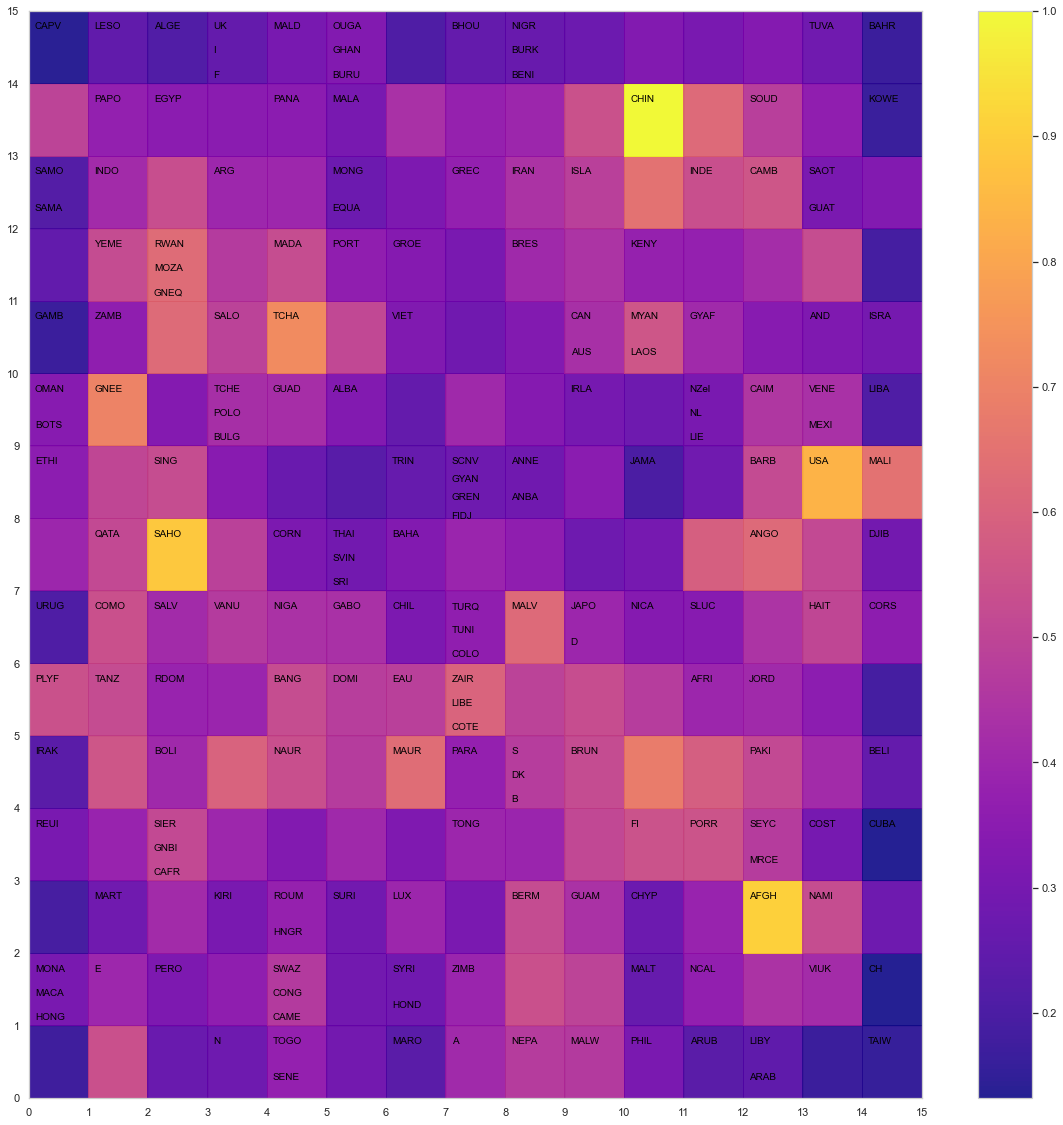

In [21]:
country_map = som.labels_map(X, df.Country)
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(20, 20))
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .2
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set,c, color= 'black', fontsize=10)
plt.pcolor(som.distance_map().T, cmap='plasma', alpha=.9)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()
plt.colorbar()
plt.show()